# Лабораторная работа 1. Нейронные сети.

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете также должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

Мы уверены, что выполнение лабораторных работ занимает значительное время, поэтому не рекомендуем оставлять их на последний вечер перед сдачей.

### Оценивание и штрафы
* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за всю работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

Обратите внимание, что мы не ставим оценку за просто написанный код, корректная работоспособность которого не подтверждена экспериментами.

### Правила сдачи
Выполненную работу следует отправить в систему Anytask. Более подробно о системе можно почитать на странице курса. Название отправляемого файла должно иметь следующий формат: Surname_Name_Group_NN.ipynb, где NN — номер лабораторной работы. Например, Kozlova_Anna_CS_01.ipynb.

# Часть 2. Fine-tuning обученных нейросетей

В этой части задания вам предстоит поработать с настоящими монстрами: сетями с почти сотней слоёв и десятками миллионов параметров. Например, такими:

![img](https://alexisbcook.github.io/assets/inception.png)
<center>googlenet inception v3</center>

Если внимательно всмотреться в картинку, можно заметить, что синим цветом обозначены свёрточные слои, красным — pooling, зелёным — конкатенация входов и т.п.

__Чем кормить такого монстра?__

Огромные нейросети обучаются на огромных массивах данных. В компьютерном зрении таких несколько, но самый популярный из них [ImageNet](http://image-net.org/). В этой выборке более миллиона изображений.

Задача этой сети состоит в классификации каждого изображения в один из 1000 классов. Вот они:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

classes = pickle.load(open('classes.pkl','rb'))
print(classes[::100])

['tench, Tinca tinca', 'black swan, Cygnus atratus', 'Tibetan terrier, chrysanthemum dog', 'tiger beetle', "academic gown, academic robe, judge's robe", 'cliff dwelling', 'hook, claw', 'paper towel', 'slot, one-armed bandit', 'water tower']


## Зоопарк нейросетей в keras

Если вы дошли до этого задания, значит вы уже знакомы с библиотекой Керас. Так вот, в ней кроме всего прочего, есть зоопарк предобученных нейросетей: [__`keras.applications`__](https://keras.io/applications/).

Ниже пример кода, который загружает обученную модель с картинки выше ([здесь](https://keras.io/applications/#inceptionv3) можно узнать о ней подробнее).

**Внимание!**
InceptionV3 требует много памяти для работы. Если ваш ПК начинает зависать:
* закройте всё кроме jupyter и браузера с одной вкладкой;
* если не помогло, загрузите эту тетрадку в [google colab](https://colab.research.google.com/) и работайте там;
* замените `zoo.InceptionV3` на `zoo.MobileNet`. Однако в этом случае вам придётся исправить и предобработку картинок.

Выберете оптимальный для вас вариант и начнем работу!

In [14]:
import keras, keras.layers as L
import keras.applications as zoo

model = zoo.InceptionV3(include_top=True, weights='imagenet')

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 149, 149, 32)  864         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 149, 149, 32)  96          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 149, 149, 32)  0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

batch_normalization_16 (BatchNor (None, 35, 35, 64)    192         conv2d_16[0][0]                  
____________________________________________________________________________________________________
activation_16 (Activation)       (None, 35, 35, 64)    0           batch_normalization_16[0][0]     
____________________________________________________________________________________________________
conv2d_14 (Conv2D)               (None, 35, 35, 48)    12288       mixed0[0][0]                     
____________________________________________________________________________________________________
conv2d_17 (Conv2D)               (None, 35, 35, 96)    55296       activation_16[0][0]              
____________________________________________________________________________________________________
batch_normalization_14 (BatchNor (None, 35, 35, 48)    144         conv2d_14[0][0]                  
___________________________________________________________________________________________

batch_normalization_30 (BatchNor (None, 17, 17, 96)    288         conv2d_30[0][0]                  
____________________________________________________________________________________________________
activation_27 (Activation)       (None, 17, 17, 384)   0           batch_normalization_27[0][0]     
____________________________________________________________________________________________________
activation_30 (Activation)       (None, 17, 17, 96)    0           batch_normalization_30[0][0]     
____________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)   (None, 17, 17, 288)   0           mixed2[0][0]                     
____________________________________________________________________________________________________
mixed3 (Concatenate)             (None, 17, 17, 768)   0           activation_27[0][0]              
                                                                   activation_30[0][0]     

batch_normalization_47 (BatchNor (None, 17, 17, 160)   480         conv2d_47[0][0]                  
____________________________________________________________________________________________________
activation_42 (Activation)       (None, 17, 17, 160)   0           batch_normalization_42[0][0]     
____________________________________________________________________________________________________
activation_47 (Activation)       (None, 17, 17, 160)   0           batch_normalization_47[0][0]     
____________________________________________________________________________________________________
conv2d_43 (Conv2D)               (None, 17, 17, 160)   179200      activation_42[0][0]              
____________________________________________________________________________________________________
conv2d_48 (Conv2D)               (None, 17, 17, 160)   179200      activation_47[0][0]              
___________________________________________________________________________________________

batch_normalization_54 (BatchNor (None, 17, 17, 192)   576         conv2d_54[0][0]                  
____________________________________________________________________________________________________
batch_normalization_59 (BatchNor (None, 17, 17, 192)   576         conv2d_59[0][0]                  
____________________________________________________________________________________________________
batch_normalization_60 (BatchNor (None, 17, 17, 192)   576         conv2d_60[0][0]                  
____________________________________________________________________________________________________
activation_51 (Activation)       (None, 17, 17, 192)   0           batch_normalization_51[0][0]     
____________________________________________________________________________________________________
activation_54 (Activation)       (None, 17, 17, 192)   0           batch_normalization_54[0][0]     
___________________________________________________________________________________________

____________________________________________________________________________________________________
conv2d_71 (Conv2D)               (None, 17, 17, 192)   147456      mixed7[0][0]                     
____________________________________________________________________________________________________
conv2d_75 (Conv2D)               (None, 17, 17, 192)   258048      activation_74[0][0]              
____________________________________________________________________________________________________
batch_normalization_71 (BatchNor (None, 17, 17, 192)   576         conv2d_71[0][0]                  
____________________________________________________________________________________________________
batch_normalization_75 (BatchNor (None, 17, 17, 192)   576         conv2d_75[0][0]                  
____________________________________________________________________________________________________
activation_71 (Activation)       (None, 17, 17, 192)   0           batch_normalization_71[0

____________________________________________________________________________________________________
batch_normalization_90 (BatchNor (None, 8, 8, 448)     1344        conv2d_90[0][0]                  
____________________________________________________________________________________________________
activation_90 (Activation)       (None, 8, 8, 448)     0           batch_normalization_90[0][0]     
____________________________________________________________________________________________________
conv2d_87 (Conv2D)               (None, 8, 8, 384)     786432      mixed9[0][0]                     
____________________________________________________________________________________________________
conv2d_91 (Conv2D)               (None, 8, 8, 384)     1548288     activation_90[0][0]              
____________________________________________________________________________________________________
batch_normalization_87 (BatchNor (None, 8, 8, 384)     1152        conv2d_87[0][0]         

Функция ниже позволяет найти для заданного изображения топ10 классов по мнению InceptionV3.

In [3]:
from skimage.transform import resize
def predict_top10(img):
    img = resize(img, (299, 299), mode='reflect')
    assert img.min() >= 0.0 and img.max() <= 1.0
    plt.imshow(img)
    plt.show()

    img_preprocessed = zoo.inception_v3.preprocess_input(img[None] * 255)
    probs = model.predict(img_preprocessed)[0]
    labels = probs.argsort()[-1:-10:-1]

    print('top-10 classes:')
    for l in labels:
        print('%.4f\t%s' % (probs.ravel()[l], classes[l].split(',')[0]))

Проверим, как она работает на близкой к обучающей выборке картинке:

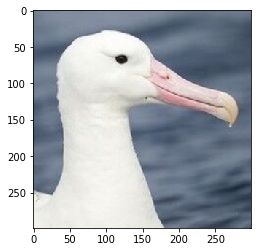

top-10 classes:
0.9082	albatross
0.0018	turnstile
0.0011	drake
0.0006	collie
0.0006	hammerhead
0.0005	nipple
0.0005	Shetland sheepdog
0.0005	goose
0.0005	cello


In [4]:
predict_top10(plt.imread('albatross.jpg'))

А теперь попробуем ее на чем-то неожиданном!

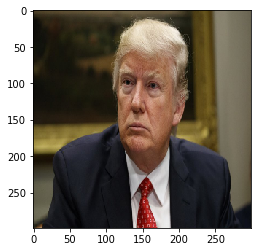

top-10 classes:
0.2686	suit
0.1248	groom
0.0550	Windsor tie
0.0092	oboe
0.0091	academic gown
0.0090	wig
0.0083	bow tie
0.0051	tobacco shop
0.0048	Afghan hound


In [5]:
#!wget http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg -O img.jpg
predict_top10(plt.imread('img.jpg'))

## Dogs Vs Cats

А теперь попробуем построить классификатор, который отличает изображение кошки от собаки. 

![img](https://dingo.care2.com/pictures/greenliving/1203/1202163.large.jpg)

Код ниже позволяет вам загрузить данные, необходимые для данного задания.

In [6]:
#!wget https://www.dropbox.com/s/d61lupw909hc785/dogs_vs_cats.train.zip?dl=1 -O data.zip
#!unzip data.zip

## Sklearn way

**Задание 2.1 (1 балл)** В вашем распоряжении есть предобученная сеть InceptionV3. Ваша задача — обучить классификатор из sklearn (на ваш выбор), который будет отличать котов от собак, используя __активации нейронной сети в качестве признаков__.

Для начала, прочитайте данные и сформируйте для вашего классификатора обучающую и тестовую выборки в пропорции 4:1. 

В вашем распоряжении всего 25 000 изображений различного размера, все в формате JPEG. Все картинки лежат в папке __`./train`__. Изображения кошек имеют название вида `./train/cat.*.jpg`, собак — `./train/dog.*.jpg`.

Считайте данные и для каждой картинки вычислите признаки из промежуточного слоя свёрточной сети. В качестве признаков можно выбрать какой-нибудь слой или несколько слоёв сети. Попробуйте найти комбинацию слоёв, которая работает лучше всего.

[Здесь](https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer) можно почитать как посчитать активацию промежуточных слоёв.

In [7]:
import os
from tqdm import tqdm

cats = []
dogs = []
for file in tqdm(os.listdir('./train/')):
    if 'cat' in file:
        img = plt.imread('./train/' + file)
        img = resize(img, (299, 299), mode='reflect')
        img = zoo.inception_v3.preprocess_input(img[None] * 255)
        cats.append(img)
    else:
        img = plt.imread('./train/' + file)
        img = resize(img, (299, 299), mode='reflect')
        img = zoo.inception_v3.preprocess_input(img[None] * 255)
        dogs.append(img)

100%|██████████| 25000/25000 [11:42<00:00, 35.56it/s]


import pandas as pd 
pd.DataFrame(cats).to_csv('cats.csv')
pd.DataFrame(dogs).to_csv('dogs.csv')

In [8]:
from keras.models import Model

layer_name = 'conv2d_12'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

In [9]:
intermediate_output_cats = []
for i in tqdm(cats):
    intermediate_output_cats.append(intermediate_layer_model.predict(i).flatten())

100%|██████████| 12500/12500 [1:24:46<00:00,  2.46it/s]


In [10]:
import gc

del cats
gc.collect()

12148

In [14]:
cats = np.array(intermediate_output_cats)
cats

array([[ 0.651396  , -0.8717472 , -0.46389318, ...,  0.6854781 ,
         1.4531968 ,  0.6129493 ],
       [ 0.3884908 , -0.9378683 , -0.18808606, ...,  0.38706252,
         1.3440137 ,  0.4338324 ],
       [ 0.9757943 , -0.58702743, -0.17760806, ...,  0.6413001 ,
         1.2522749 ,  0.05592781],
       ...,
       [ 0.68796456, -1.3998072 , -0.8812306 , ...,  0.67546654,
         1.1147877 ,  0.24521631],
       [ 0.31238207, -0.8400094 , -0.25510615, ...,  0.394578  ,
         1.2787409 ,  0.18421632],
       [ 0.34798062, -0.6645407 , -0.34601343, ...,  0.90544575,
         1.9734437 ,  0.68661845]], dtype=float32)

In [13]:
np.save('cats', cats)

In [17]:
intermediate_output_dogs = []
for i in tqdm(dogs):
    intermediate_output_dogs.append(intermediate_layer_model.predict(i).flatten())

100%|██████████| 12500/12500 [1:32:04<00:00,  2.26it/s]


In [18]:
dogs = np.array(intermediate_output_dogs)
dogs

array([[ 0.3521235 , -1.2667086 , -0.49018773, ...,  0.81523544,
         1.3299524 ,  0.35673243],
       [ 0.6221341 , -1.078087  , -0.28388742, ...,  0.79776293,
         0.9339909 ,  0.2153194 ],
       [ 0.5458395 , -0.54934406,  0.06550485, ...,  0.4541568 ,
         1.0969723 ,  0.49477857],
       ...,
       [ 0.28840172, -0.88897854, -0.13962796, ..., -0.16024485,
         1.2684054 ,  0.3102526 ],
       [ 0.5716249 , -1.184092  , -0.9434191 , ..., -0.01469395,
         1.2538553 ,  0.4265524 ],
       [ 0.41068456, -1.2129731 , -0.44446307, ...,  0.06094521,
         1.3088968 ,  0.46398425]], dtype=float32)

In [19]:
np.save('dogs', dogs)

In [20]:
del dogs
gc.collect()

13007

Разделите данные на обучение и тест в отношении 4:1.

In [21]:
X = np.concatenate([intermediate_output_cats, intermediate_output_dogs], axis=0)
y = np.concatenate([[0]* len(intermediate_output_cats), [1]* len(intermediate_output_dogs)], axis=0)
X.shape, y.shape

((25000, 39200), (25000,))

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_test.shape

((20000, 39200), (5000, 39200))

In [24]:
np.save('X_train', X_train)
np.save('X_test', X_test)
np.save('y_train', y_train)
np.save('y_test', y_test)

In [25]:
del intermediate_output_cats
del intermediate_output_dogs
gc.collect()

139

In [7]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

Обучите поверх этих признаков классификатор из sklearn (можно попробовать несколько и выбрать лучший). Попробуйте получить ROC-AUC __хотя бы 99%__.

In [9]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [12]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
roc_auc_score(clf.ptedict(X_test), y_test)

0.990387581342


**Задание 2.2 (0.5 балла)** Опишите ваши выводы о проделанной работе.

Модель очень объемная и требует очень много памяти, однако на ее мы можем быстро и просто построить классификатор с хорошим качесвом.

## Fine-tuning

**Задание 2.3 (2 балла)** Давайте попробуем добиться ещё большего качества через дообучение (fine-tuning) модели. Новая цель — получить качество лучше, чем у классификатора из предыдущего пункта на признаках `InceptionV3`. Цель этого задания: получить значение ROC-AUC __не меньше 99.5%__.

__Шаг 1.__  Постройте сеть, в которой InceptionV3 "без головы" используется в качестве первого слоя. Поверх неё надстройте новую голову из `keras.layers` — она будет отличать котов от собак. Это можно сделать с помощью [общего интерфейса модели](https://keras.io/models/model/).

In [17]:
from keras.models import Model
from keras.layers import Input, Dense


base_model = zoo.InceptionV3(include_top=True, weights='imagenet')
x = base_model.output
predictions = Dense(2, activation='softmax')(x)
model = Model(input=base_model.input, output=predictions)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=dense_1/de..., outputs=Softmax.0)`
  


__Шаг 2.__ Обучите "голову" на обучающей выборке, не меняя весов изначальной сети. Частично обучать сеть в keras можно [вот так](https://keras.io/getting-started/faq/#how-can-i-freeze-keras-layers).

In [20]:
x = base_model.output
layer = Dense(32, activation='softmax')(x)
layer.trainable = False
y = layer(x)

frozen_model = model(x, y)
frozen_model.compile(optimizer='rmsprop', loss='mse')

__Sanity check:__ После этого шага ваша модель должна уже быть сравнима по точности с моделями из задания 1.

Если всё получилось, самое время [сохранить модель](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model).

In [21]:
from keras.models import load_model

model.save('calc/task2.h5')

__Шаг 3.__ "Разморозьте" несколько предыдущих слоёв модели и продолжите обучение. На этом этапе важно не переобучиться: смотрите на качество на валидации.

Если качество не улучшается, а сразу идёт вниз, попробуйте уменьшить число обучаемых слоёв или воспользуйтесь [аугментацией данных](https://keras.io/preprocessing/image/). В общем случае, всегда полезно помнить про аугментацию данных даже если и без неё всё работает — иногда она творит [чудеса](https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced).

In [22]:
layer.trainable = True
trainable_model = model(x, y)
trainable_model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
frozen_model.fit(X_train, y_train)  
trainable_model.fit(X_train, y_train) 

__Шаг 4.__ Вычислите финальное качество.

In [ ]:
roc_auc_score(trainable_model.ptedict(X_test), y_test)

**Задание 2.4 (0.5 балла)** Напишите отчёт и вознаградите себя за старания чем-нибудь.

Использование предобученных сетей дает большие возможности, но для тренировки этой модели нужен хороший сервер, даже на котором понадобилось слишком много времени и ресурсов.

# Всё сделали, но азарт не прошел?

В таких случаях можно пробовать следующие техники:
* Ансамбль из нескольких предобученных нейросетей. Bagging? Stacking? Boosting? Всё что пожелаете.
* Более честный эксперимент: разделяем данные на train/__dev__/test, все сравнения делаем по dev, а test используем только в самом конце.
* Аугментировать данные картинками из интернета. Уж чего, а котиков и собачек там хватает.